In [1]:
from transformers import AutoProcessor, PaliGemmaForConditionalGeneration
from PIL import Image
import torch
import requests

model_id = "google/paligemma-3b-mix-224"

model = PaliGemmaForConditionalGeneration.from_pretrained(model_id).eval().to(device="cuda")
processor = AutoProcessor.from_pretrained(model_id)


c:\Users\Sukhvansh Jain\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\models\paligemma\configuration_paligemma.py:137: FutureWarning: The `vocab_size` attribute is deprecated and will be removed in v4.44, Please use `text_config.vocab_size` instead.
  warnings.warn(
`config.hidden_act` is ignored, you should use `config.hidden_activation` instead.
Gemma's activation function will be set to `gelu_pytorch_tanh`. Please, use
`config.hidden_activation` if you want to override this behaviour.
See https://github.com/huggingface/transformers/pull/29402 for more details.


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

In [2]:
from src.constants import allowed_units, entity_unit_map

12"


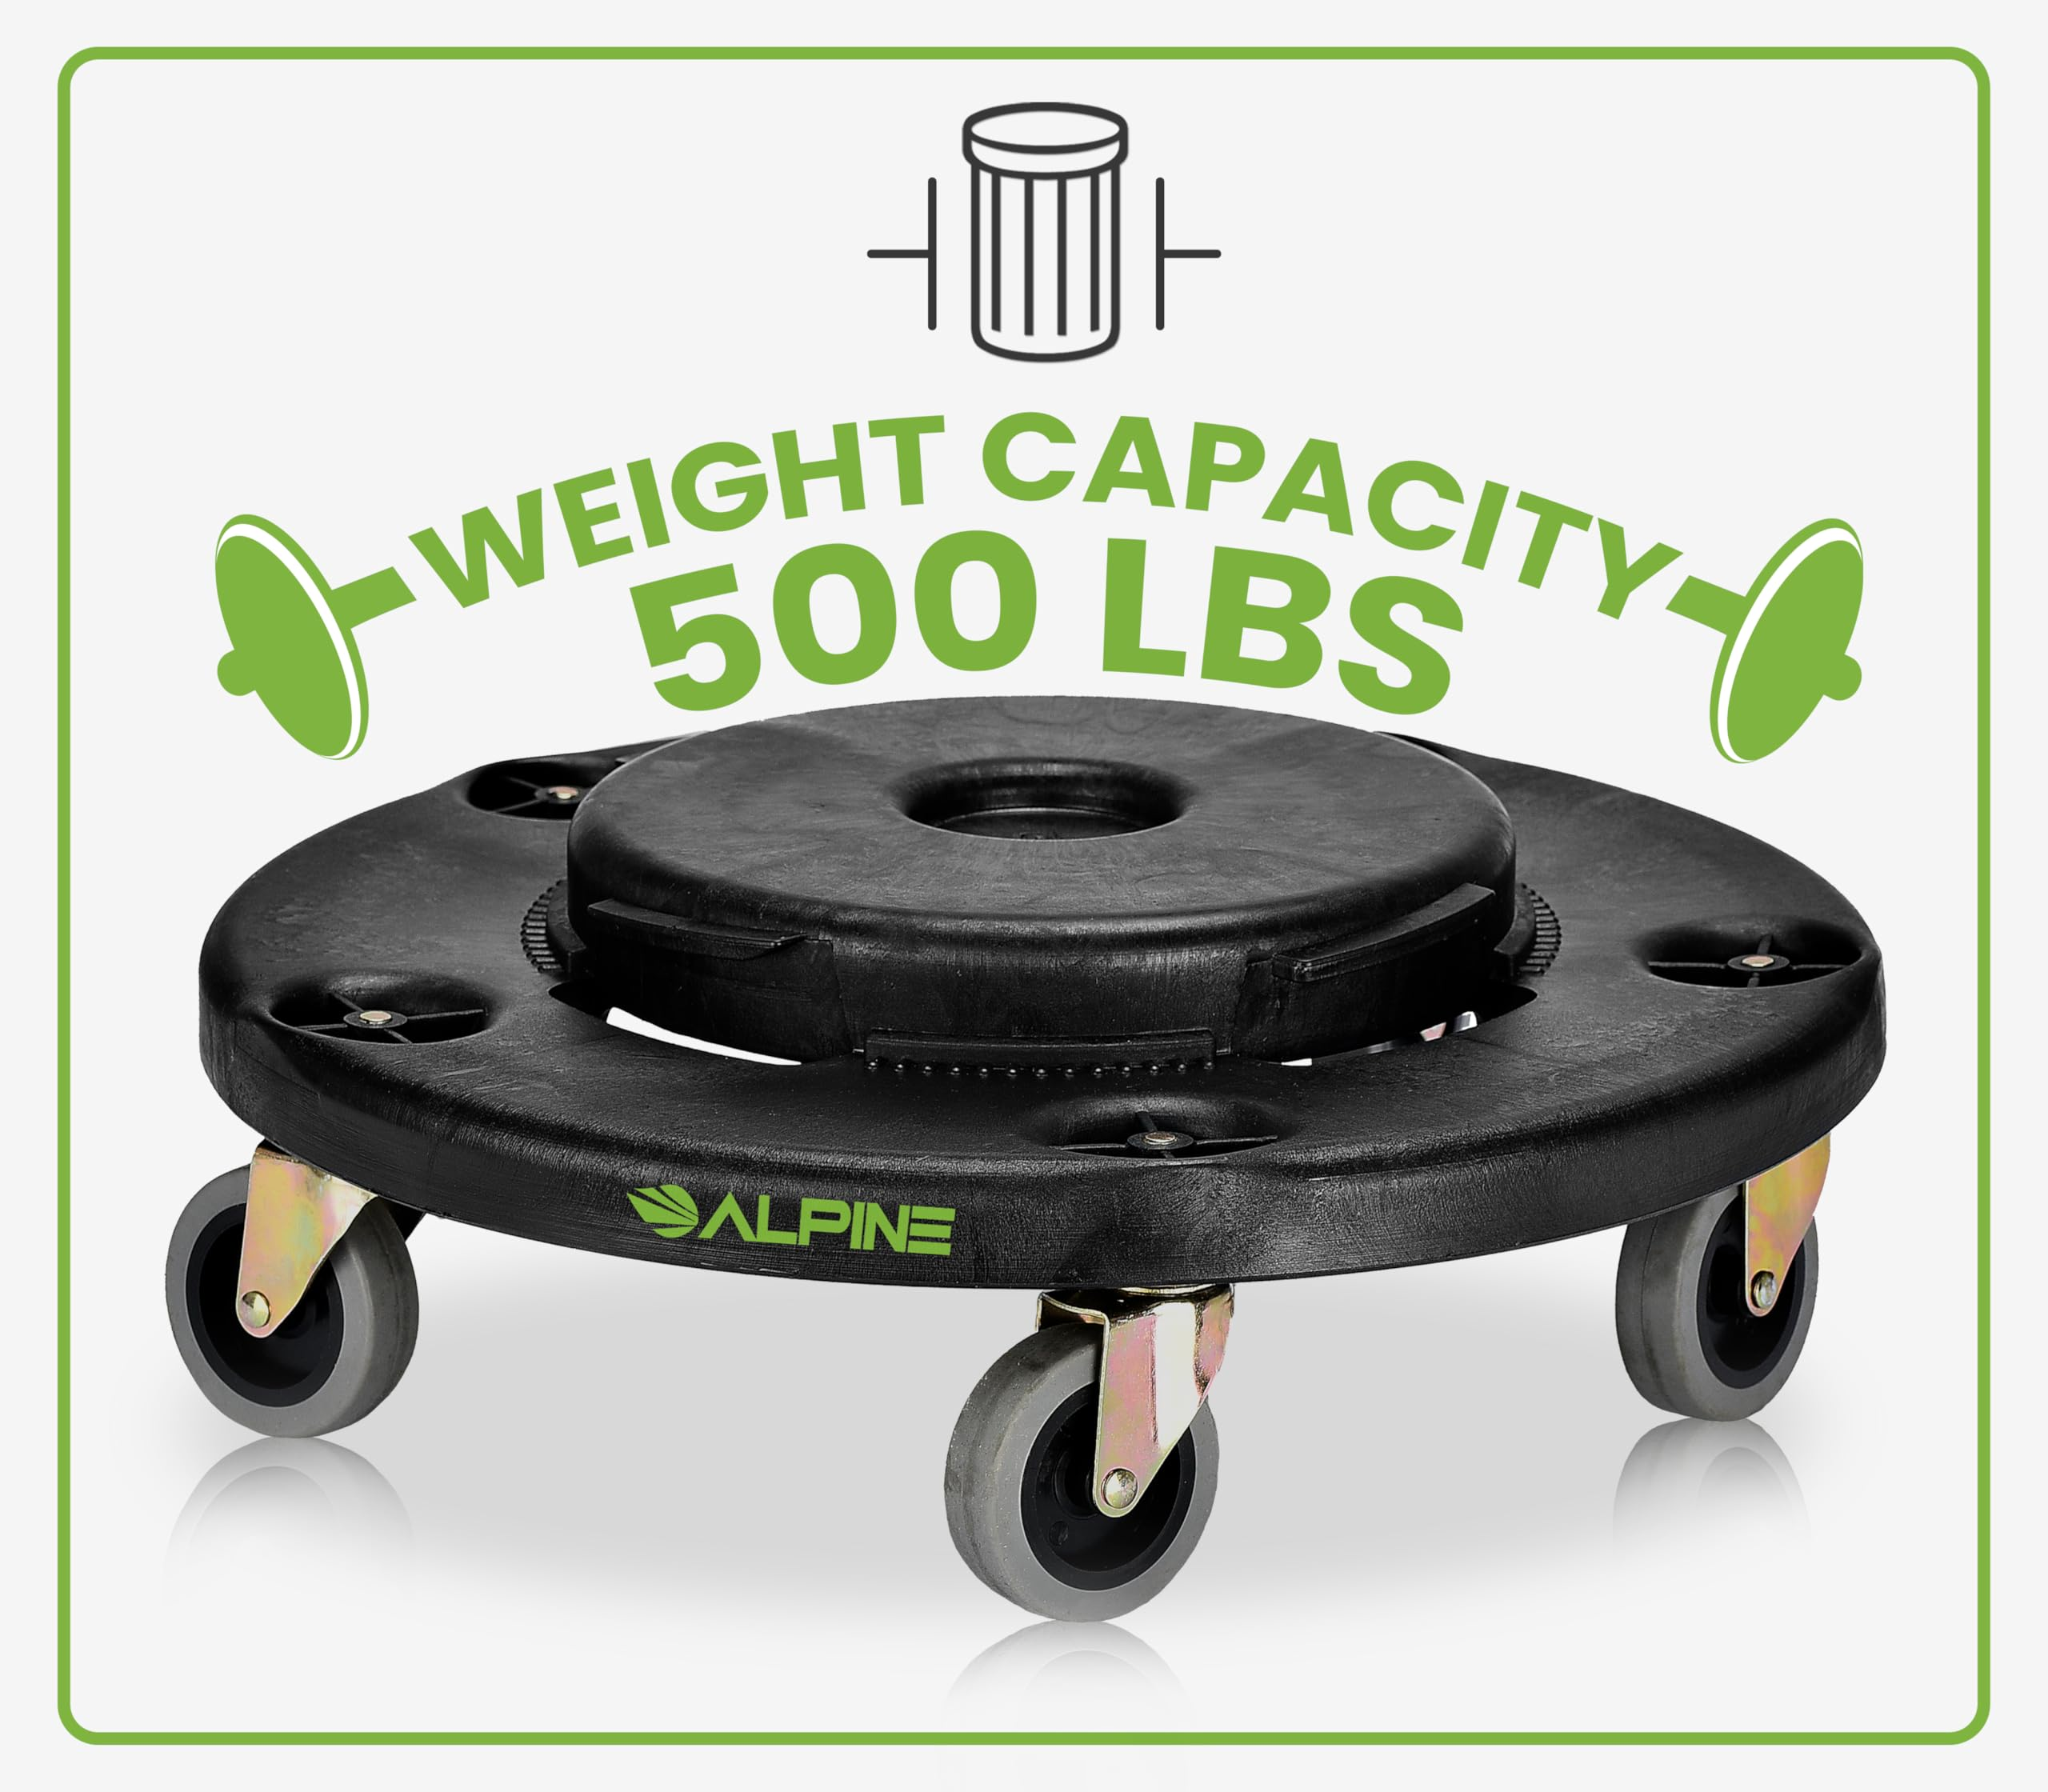

In [8]:
url = r"images\81aZ2ozp1GL.jpg"
attribute = 'length'
image = Image.open(url)
prompt = f"What is the {attribute} of the product in the image? If the {attribute} isn't specified in the image output an empty string"# You are only allowed to use the below constants for quantifying the attribute and have to write the full forms of the constants.\n {entity_unit_map}"
model_inputs = processor(text=prompt, images=image, return_tensors="pt").to(device='cuda')
input_len = model_inputs["input_ids"].shape[-1]

with torch.inference_mode():
    generation = model.generate(**model_inputs, max_new_tokens=100, do_sample=False)
    generation = generation[0][input_len:]
    decoded = processor.decode(generation, skip_special_tokens=True)
    print(decoded)

image

In [4]:
print(model)

PaliGemmaForConditionalGeneration(
  (vision_tower): SiglipVisionModel(
    (vision_model): SiglipVisionTransformer(
      (embeddings): SiglipVisionEmbeddings(
        (patch_embedding): Conv2d(3, 1152, kernel_size=(14, 14), stride=(14, 14), padding=valid)
        (position_embedding): Embedding(256, 1152)
      )
      (encoder): SiglipEncoder(
        (layers): ModuleList(
          (0-26): 27 x SiglipEncoderLayer(
            (self_attn): SiglipSdpaAttention(
              (k_proj): Linear(in_features=1152, out_features=1152, bias=True)
              (v_proj): Linear(in_features=1152, out_features=1152, bias=True)
              (q_proj): Linear(in_features=1152, out_features=1152, bias=True)
              (out_proj): Linear(in_features=1152, out_features=1152, bias=True)
            )
            (layer_norm1): LayerNorm((1152,), eps=1e-06, elementwise_affine=True)
            (mlp): SiglipMLP(
              (activation_fn): PytorchGELUTanh()
              (fc1): Linear(in_features

(1200, 1200, 3)


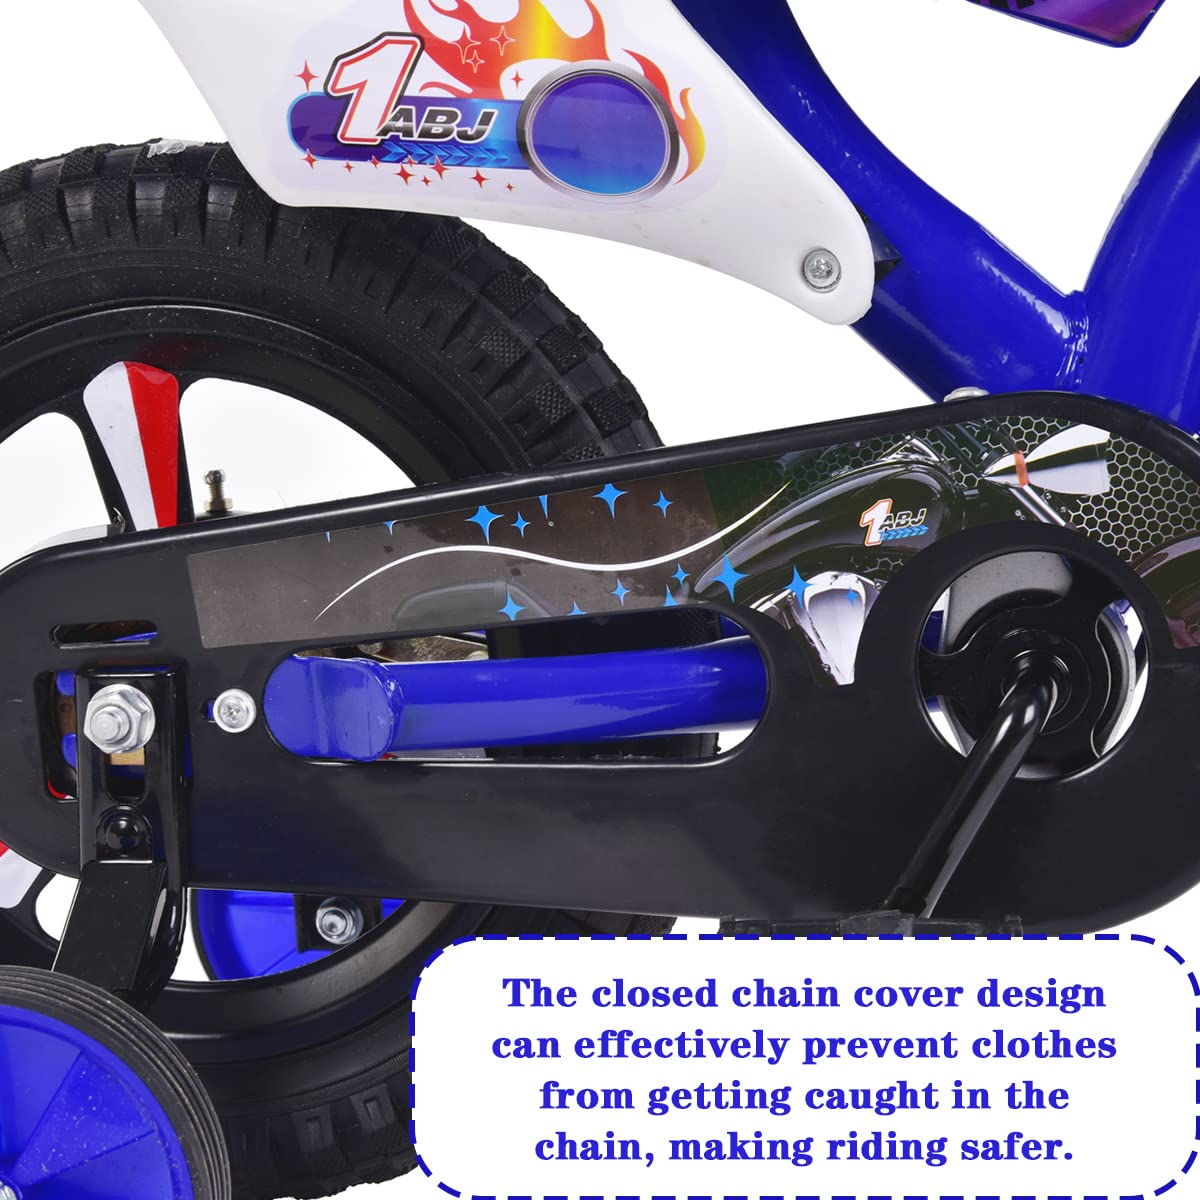

In [5]:
from PIL import Image
import requests
import numpy as np

img = Image.open(requests.get('https://m.media-amazon.com/images/I/71BNVSmQCxL.jpg', stream=True).raw)
image_matrix = np.array(img)
print(image_matrix.shape)
img

unanswerable


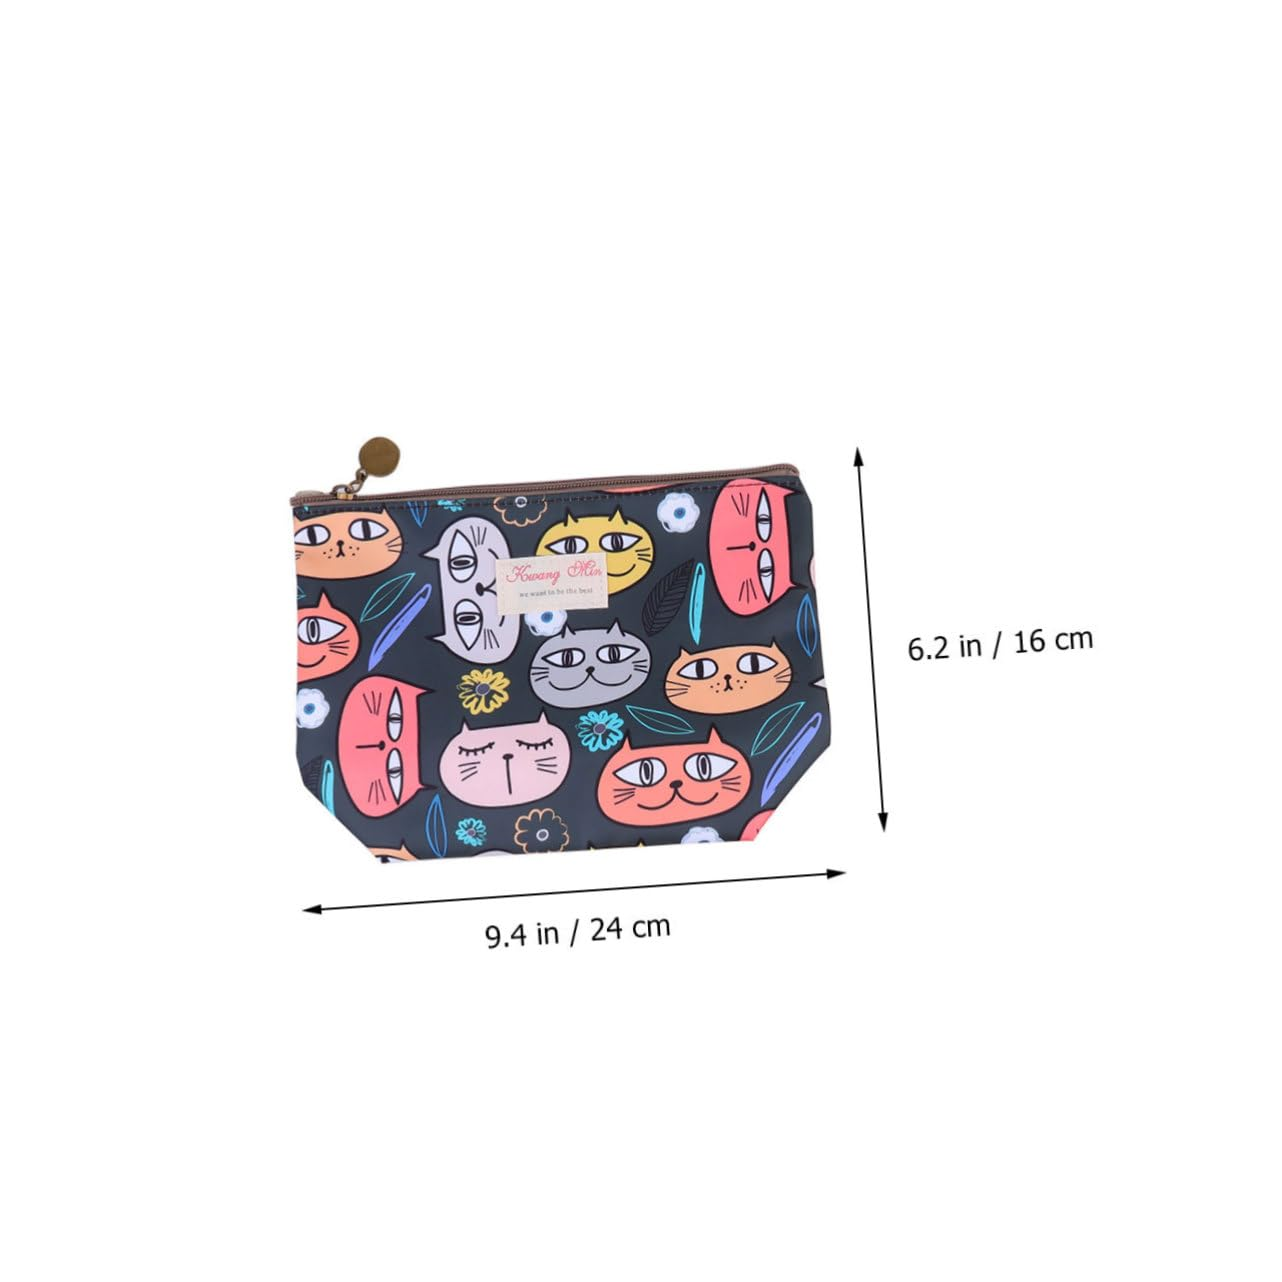

In [6]:
url = r"images\51-WIOx5pxL.jpg"
attribute = 'length'
image = Image.open(url)
prompt = f"Describer this product. Put emphasis on the numeric quantities in the image"
model_inputs = processor(text=prompt, images=image, return_tensors="pt").to(device='cuda')
input_len = model_inputs["input_ids"].shape[-1]

with torch.inference_mode():
    generation = model.generate(**model_inputs, max_new_tokens=100, do_sample=False)
    generation = generation[0][input_len:]
    decoded = processor.decode(generation, skip_special_tokens=True)
    print(decoded)

image